![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

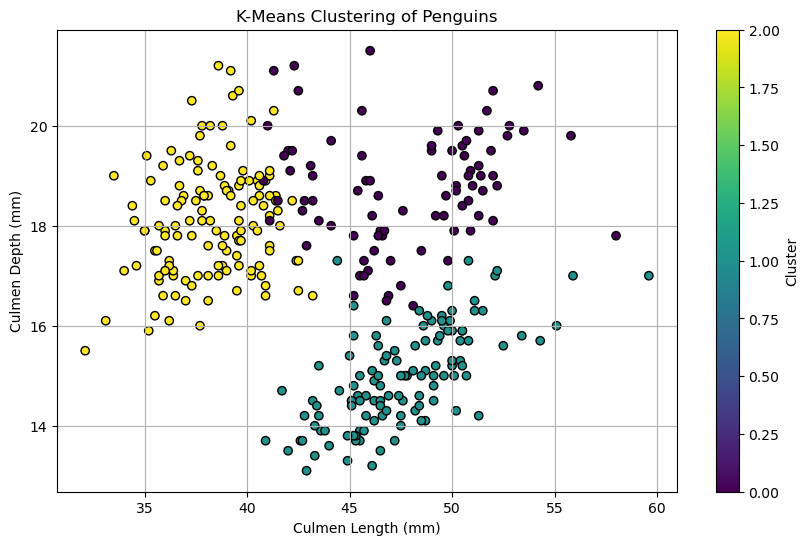

         culmen_length_mm  culmen_depth_mm  flipper_length_mm
Cluster                                                      
0               47.662353        18.748235         196.917647
1               47.568067        14.996639         217.235294
2               38.305469        18.098437         188.554688


In [14]:
# Import Required Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

# Display the first few rows of the dataset
penguins_df.head()

# Data Preprocessing
penguins_df.dropna(inplace=True)  # Remove rows with missing values
penguins_df = penguins_df.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Standardizing the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_df)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_scaled)

# Adding cluster labels to the original DataFrame
penguins_df['Cluster'] = kmeans.labels_

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'],
            c=penguins_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering of Penguins')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Calculate mean statistics for numeric columns by cluster
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
stat_penguins = penguins_df[numeric_columns + ['Cluster']].groupby('Cluster').mean()
print(stat_penguins)